In [1]:
!pip install scikit_posthocs

In [60]:
#import libraries
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'random' to generate a random sample
import random

# import 'seaborn'
import seaborn as sns

from scipy.stats import skew
from scipy.stats import norm

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm


import scipy.stats

# import 'stats' package from scipy library
from scipy import stats
from scipy.stats import randint
from scipy.stats import skewnorm

# import 'stats' package from scipy library
from scipy import stats

# import statistics to perform statistical computations
import statistics

# to test the normality 
from scipy.stats import shapiro

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc

# import function to perform post-hoc
# install scikit_posthocs using "!pip install scikit_posthocs" 
import scikit_posthocs

In [61]:
age = [42,44,62,35,20,30,56,20,23,41,55,22,31,27,66,21,18,24,42,25,32,50,31,26,36,39,40,18,36,22]

In [12]:
statistics.mean(age)

34.46666666666667

In [13]:
statistics.median(age)

31.5

In [14]:
int(stats.mode(age)[0])

18

In [16]:
#Q2. Compute the range , variance and standard deviation of customer ages

range_age = max(age) - min(age)
print("range is :" ,range_age)

range is : 48


In [17]:
statistics.variance(age)

177.36091954022987

In [18]:
statistics.stdev(age)

13.31769197497186

In [19]:
#Q3. Find the mean deviation for the data .

#  Mean Deviation is how deviated are each of the elements of the list from the list mean.
print("The original list is : " + str(age))
  
res = []
  
# getting mean
mean_val = np.mean(age)
  
for ele in age:
    # getting deviation
    res.append(abs( ele - mean_val ))
    
print("Mean deviations : " + str(res))

The original list is : [42, 44, 62, 35, 20, 30, 56, 20, 23, 41, 55, 22, 31, 27, 66, 21, 18, 24, 42, 25, 32, 50, 31, 26, 36, 39, 40, 18, 36, 22]
Mean deviations : [7.533333333333331, 9.533333333333331, 27.53333333333333, 0.5333333333333314, 14.466666666666669, 4.466666666666669, 21.53333333333333, 14.466666666666669, 11.466666666666669, 6.533333333333331, 20.53333333333333, 12.466666666666669, 3.4666666666666686, 7.466666666666669, 31.53333333333333, 13.466666666666669, 16.46666666666667, 10.466666666666669, 7.533333333333331, 9.466666666666669, 2.4666666666666686, 15.533333333333331, 3.4666666666666686, 8.466666666666669, 1.5333333333333314, 4.533333333333331, 5.533333333333331, 16.46666666666667, 1.5333333333333314, 12.466666666666669]


<AxesSubplot:ylabel='Density'>

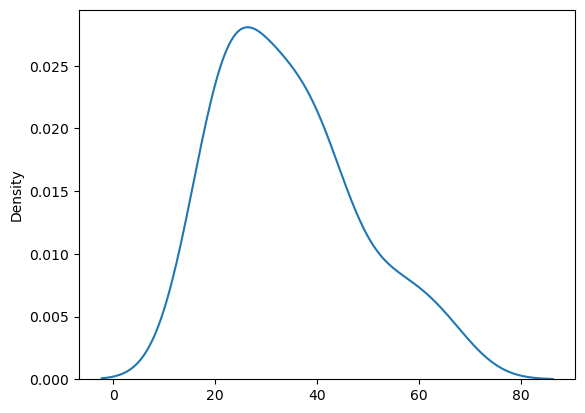

In [20]:
#Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data
sns.kdeplot(age) 


From the KDE Plot, we can determine that the list is slightly right skewed.

In [24]:
skew(age)

0.7553641682223312

As the skewness value > 0 , the list is positively skewed.

In [25]:
#Q5. Count the number of data values that fall within two standard deviations of the mean.
# Compare this with the answer from Chebyshev’s Theorem.

# Chebyshev's inequality formula

def chebyshev_inequality(k):
    return 1 / k**2





In [26]:
# function to find probability for different values in the list

p_cheb = np.zeros(len(age))

print('Chebyshev_Inequality for different values in the list :\n') 

for i in range(len(age)):
    p_cheb[i] = chebyshev_inequality(age[i])
    print('No of data values that fall within two std dev using Chebyshev formula for',age[i],'=', p_cheb[i])

Chebyshev_Inequality for different values in the list :

No of data values that fall within two std dev using Chebyshev formula for 42 = 0.0005668934240362812
No of data values that fall within two std dev using Chebyshev formula for 44 = 0.0005165289256198347
No of data values that fall within two std dev using Chebyshev formula for 62 = 0.00026014568158168577
No of data values that fall within two std dev using Chebyshev formula for 35 = 0.0008163265306122449
No of data values that fall within two std dev using Chebyshev formula for 20 = 0.0025
No of data values that fall within two std dev using Chebyshev formula for 30 = 0.0011111111111111111
No of data values that fall within two std dev using Chebyshev formula for 56 = 0.00031887755102040814
No of data values that fall within two std dev using Chebyshev formula for 20 = 0.0025
No of data values that fall within two std dev using Chebyshev formula for 23 = 0.001890359168241966
No of data values that fall within two std dev using C

In [30]:
# Probability using normal distrbution

p_norm = np.zeros(len(age))

for i in range(len(age)):
   p_norm[i] = (1 - norm.cdf(age[i])) * 2

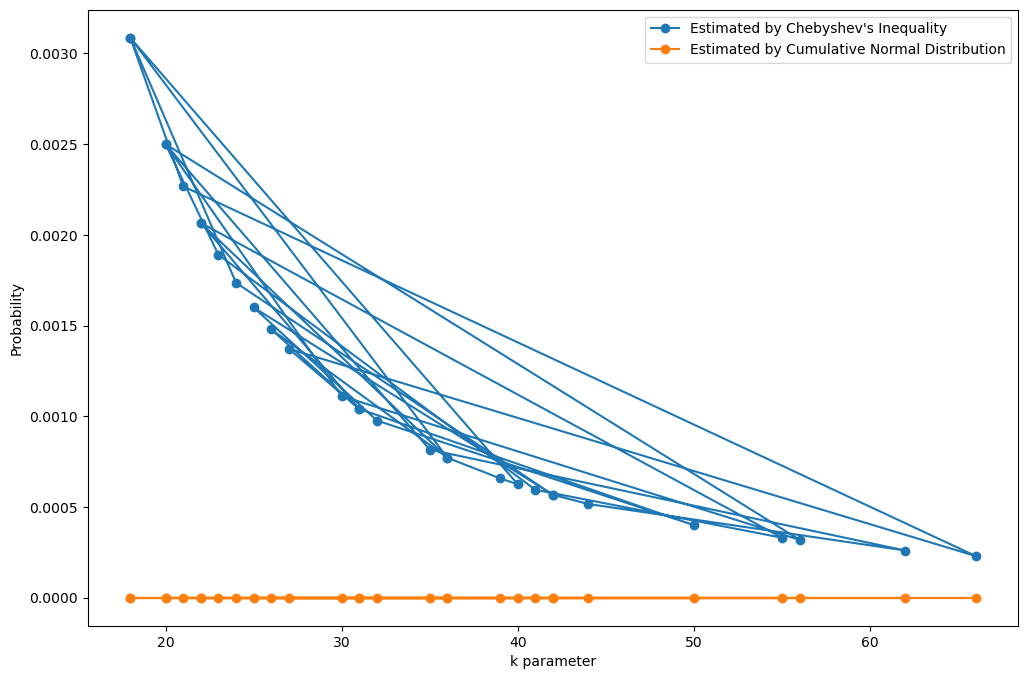

In [31]:
plt.figure(figsize=(12,8))
plt.plot(age,p_cheb,'-o')
plt.plot(age,p_norm, '-o')
plt.xlabel('k parameter')
plt.ylabel('Probability')
plt.legend(["Estimated by Chebyshev's Inequality","Estimated by Cumulative Normal Distribution"]);

The figure shows that Chebyshev's Inequality provides an upper bound (the blue curve) for the true ratio of large numbers that can be drawn from a unit normal distribution (the orange curve). Note that Chebyshevs's Inequality provides tighter bounds for larger k values.

In [32]:
#Q6. Find the three quartiles and the interquartile range (IQR).

q1 = np.percentile(age,25)
q2 = np.percentile(age,50)
q3 = np.percentile(age,75)
iqr = q3 - q1

print('First Quartile =',q1)
print('Second Quartile =',q2)
print('Third Quartile =',q3)
print('Inter Quartile Range =',iqr)

First Quartile = 23.25
Second Quartile = 31.5
Third Quartile = 41.75
Inter Quartile Range = 18.5


In [33]:
#Q7. Are there any outliers in the data set ?


ul= q3 + 1.5 * iqr # Upper Bound
ll= q1 - 1.5 * iqr # Lower Bound

# Checking if any element in the age list is not falling under the range of Upper Bound and Lower Bound

for i in age:
    if (i>ul) | (i < ll) :
        print(i)
    else:
        print(i,' is Not an Outlier')

42  is Not an Outlier
44  is Not an Outlier
62  is Not an Outlier
35  is Not an Outlier
20  is Not an Outlier
30  is Not an Outlier
56  is Not an Outlier
20  is Not an Outlier
23  is Not an Outlier
41  is Not an Outlier
55  is Not an Outlier
22  is Not an Outlier
31  is Not an Outlier
27  is Not an Outlier
66  is Not an Outlier
21  is Not an Outlier
18  is Not an Outlier
24  is Not an Outlier
42  is Not an Outlier
25  is Not an Outlier
32  is Not an Outlier
50  is Not an Outlier
31  is Not an Outlier
26  is Not an Outlier
36  is Not an Outlier
39  is Not an Outlier
40  is Not an Outlier
18  is Not an Outlier
36  is Not an Outlier
22  is Not an Outlier


<AxesSubplot:>

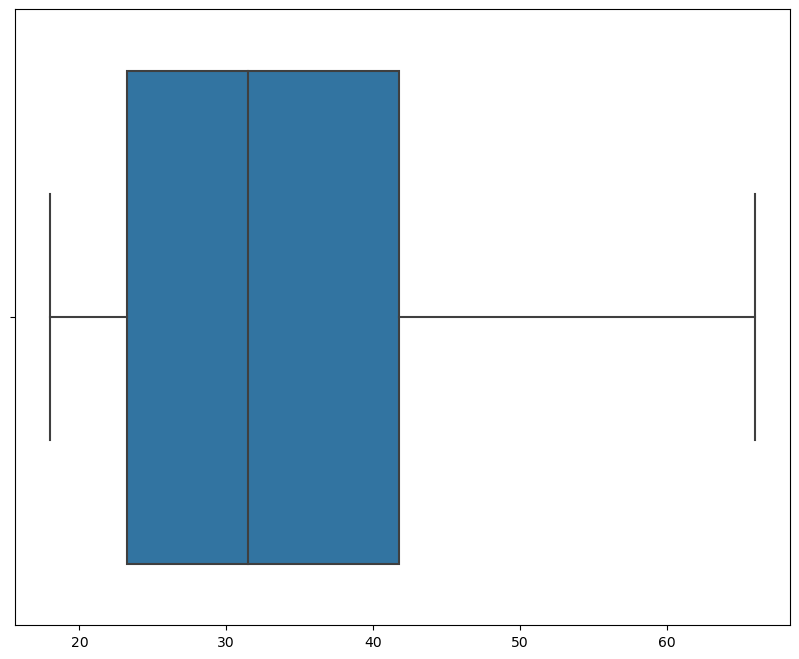

In [34]:

# Q8. Draw a boxplot of the dataset to confirm .

plt.figure(figsize=(10,8))
sns.boxplot(age)

There are no outliers in the dataset.

In [35]:
#Q9. Find the percentile rank of the datapoint 50.

np.percentile(age,50)

31.5

In [36]:
#Q10. What is the probability that a person ordering an EV scooter is above 50 years old?

# Sample Space
num = 30

# Outcomes of a person being above the age of 50 years old
outcomes = 4

# Divide possible outcomes by the sample set
probability = outcomes / num

# Print probability rounded to two decimal places
print(round(probability, 2))


0.13


In [37]:
#Q11. Create a frequency distribution for the data and visualize it appropriately

#define Series
data = pd.Series(age)

#find frequencies of each value
data.value_counts()

42    2
36    2
20    2
22    2
31    2
18    2
21    1
39    1
26    1
50    1
32    1
25    1
24    1
27    1
66    1
44    1
55    1
41    1
23    1
56    1
30    1
35    1
62    1
40    1
dtype: int64

<AxesSubplot:ylabel='Density'>

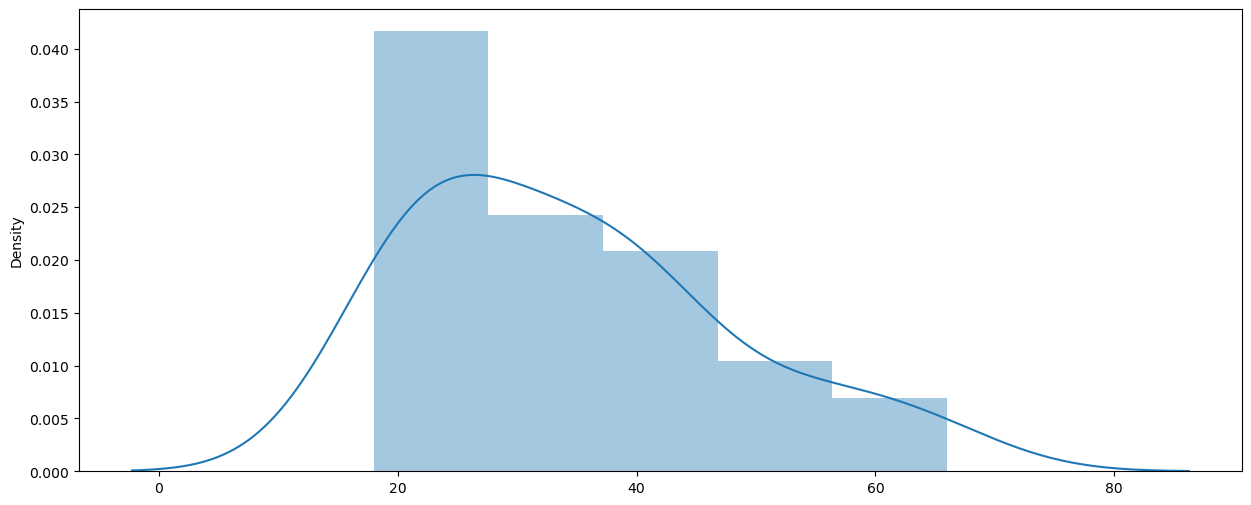

In [38]:
plt.figure(figsize=(15,6))
sns.distplot(age)

Conclusion - Maximum buyers are in the age range of 18-30.

[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

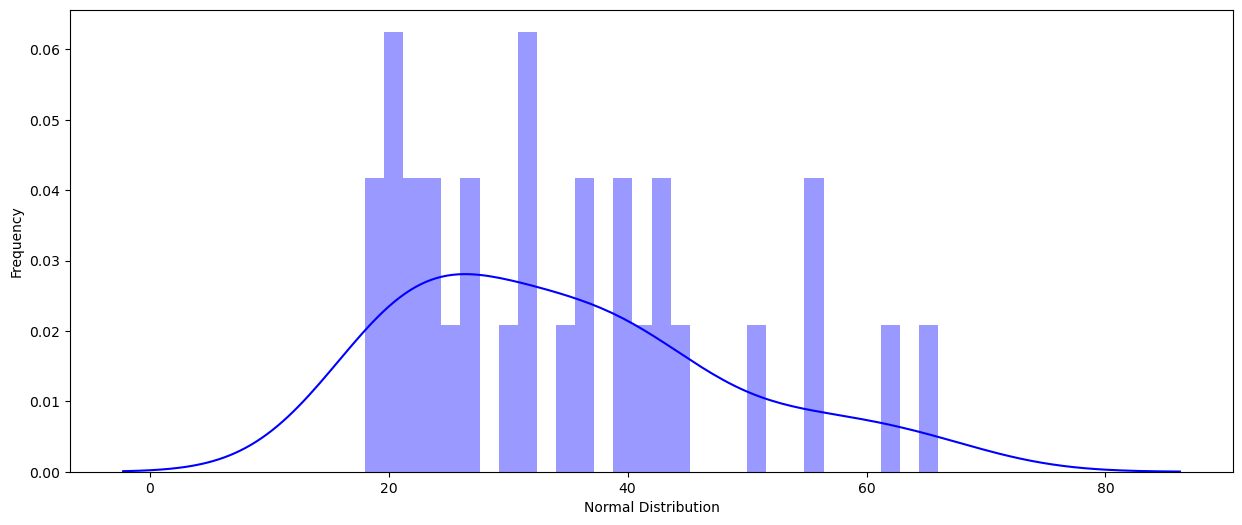

In [40]:
# Q12. Create a probability distribution of the data and visualize it appropriately

plt.figure(figsize=(15,6))

ax = sns.distplot(age,
                  bins=30,
                  kde=True,
                  color='blue')

ax.set(xlabel='Normal Distribution', ylabel='Frequency')

Q13. What is the shape of the distribution of this dataset? Create an appropriate graph to determine that. Take 100 random samples with replacement from this dataset of size 5 each. Create a sampling distribution of the mean age of customers. Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate the Central Limit Theorem? 

In [41]:
len(age)

30

Sampling Distrbution of Sample size 100

In [45]:
# pass the data to the parameter, 'population'
# pass the required sample size to the parameter, 'k' 

sample_wr = random.choices(population = age, k = 100)

# print the sample
print('Sample with replacement:', sample_wr)

Sample with replacement: [42, 21, 40, 25, 56, 42, 31, 56, 27, 36, 42, 27, 66, 23, 20, 42, 44, 21, 62, 44, 21, 18, 40, 31, 26, 42, 30, 22, 42, 27, 44, 23, 62, 42, 23, 36, 30, 42, 27, 56, 39, 20, 62, 18, 18, 36, 42, 18, 66, 22, 18, 24, 26, 62, 42, 31, 66, 50, 42, 35, 40, 18, 40, 23, 42, 42, 35, 32, 36, 41, 36, 18, 66, 42, 23, 22, 36, 42, 42, 35, 25, 35, 62, 36, 39, 31, 35, 31, 31, 27, 21, 22, 62, 23, 42, 20, 27, 25, 21, 18]


In Simple Random Sampling Without Replacement (SRSWOR) an observation can occur only once as we do not replace the selected observation before drawing the next sample.
If there are N observations in the population then the probability of drawing n samples without replacement is  1(Nn)

In [46]:
skew(sample_wr)

0.7195845184795076

Thus it is a rightly skewed population.

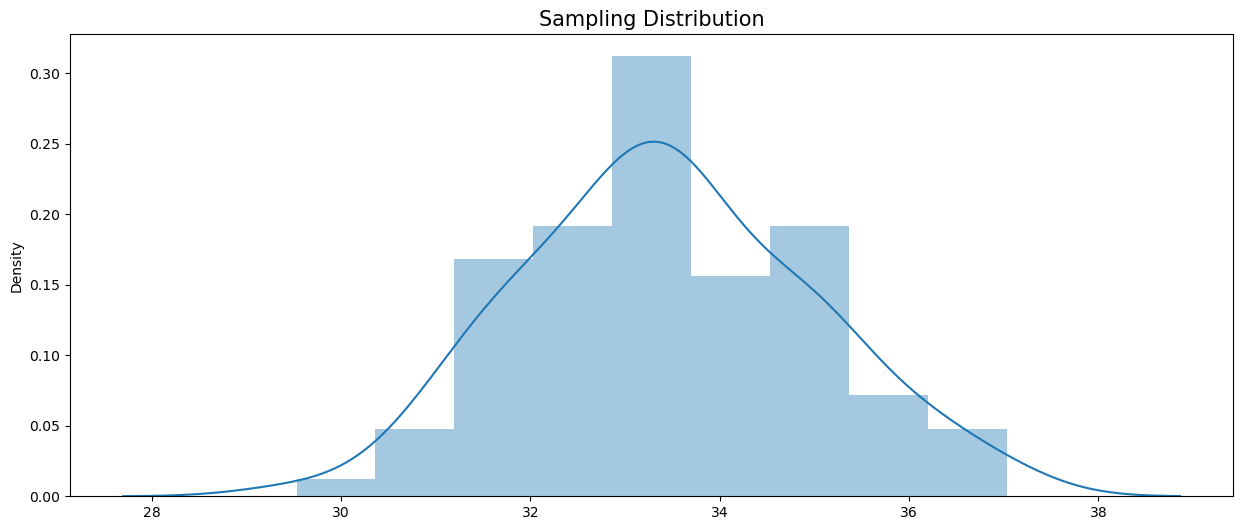

In [52]:
# create a sampling distribution from the above population with replacement
# first we define the number of samples to be drawn 
n_samples=100

# create an empty list to store the means of each sample
sample_means = []

# create a for loop to get the sample means array
for i in range(n_samples):
    # generates a random sample of size 100 from the population array
    sample = np.random.choice(sample_wr, size=100, replace=True)
        
    # calculate the mean of the sample data
    sample_mean = np.mean(sample)
        
    # append the mean to the list
    sample_means.append(sample_mean) 
    
# plot the distribution of the sample means 
plt.figure(figsize=(15,6))
sns.distplot(sample_means)

# give the graph a title
plt.title("Sampling Distribution", fontsize=15)

# display the graph
plt.show()

We observe from the above experiment that even though the population was right skewed , a sampling distribution of samples with size 100 is almost a normal distribution.

This corroborates with the CENTRAL LIMIT THEOREM.

Sampling Distrbution of Sample size 10

In [49]:
# pass the data to the parameter, 'population'
# pass the required sample size to the parameter, 'k' 

sample_wr = random.choices(population = age, k = 10)

# print the sample
print('Sample with replacement:', sample_wr)

Sample with replacement: [18, 26, 20, 36, 26, 22, 55, 50, 22, 62]


In [50]:
skew(sample_wr)

0.7239230214203098

Thus it is a left skewed population.

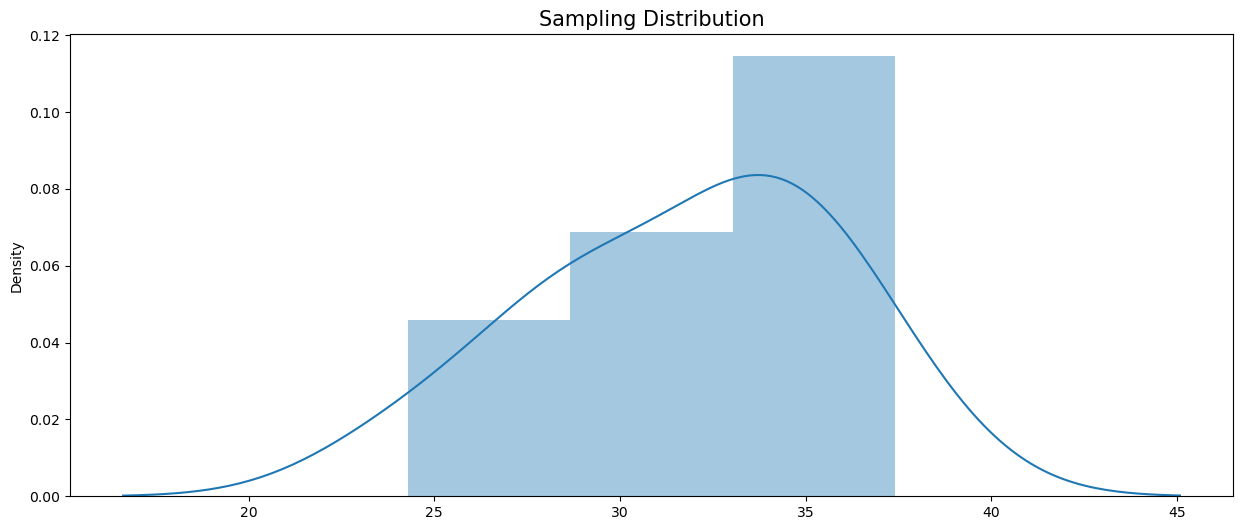

In [51]:
# create a sampling distribution from the above population with replacement
# first we define the number of samples to be drawn 
n_samples=10

# create an empty list to store the means of each sample
sample_means = []

# create a for loop to get the sample means array
for i in range(n_samples):
    # generates a random sample of size 10 from the population array
    sample = np.random.choice(sample_wr, size=10, replace=True)
        
    # calculate the mean of the sample data
    sample_mean = np.mean(sample)
        
    # append the mean to the list
    sample_means.append(sample_mean) 
    
# plot the distribution of the sample means 
plt.figure(figsize=(15,6))
sns.distplot(sample_means)

# give the graph a title
plt.title("Sampling Distribution", fontsize=15)

# display the graph
plt.show()

We observe from the above experiment that even though the population was right skewed , a sampling distribution of samples with size 100 is not a normal distribution.

This does not corroborate with the CENTRAL LIMIT THEOREM.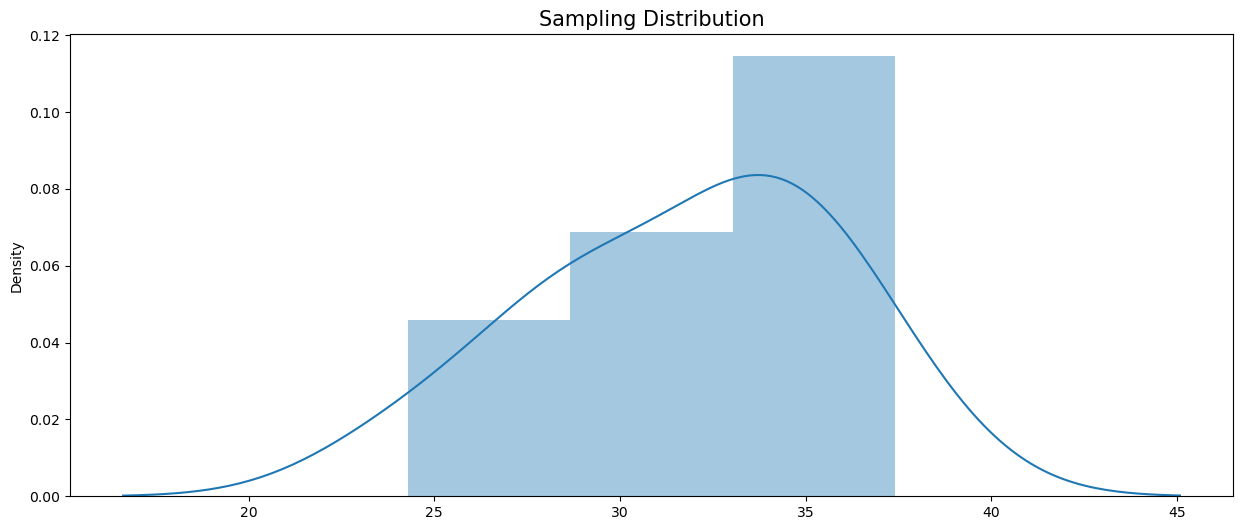

 Q14. Treat this dataset as a binomial distribution where p is the probability that a person ordering an EV is above 50 years age. What is the probability that out of a random sample of 10 buyers exactly 6 are above 50 years of age?

In [53]:
# use 'binom.pmf()' to calculate the pmf for binomial distribution 
# pass the required value to the parameter, 'k' 
# pass number of total shots fired to the parameter, 'n'
# probability of people being above the age of 50 is 4/50

prob = stats.binom.pmf(k = 6, n = 10, p = 4/50)

# use 'round()' to round-off the value to 2 digits
print('The probability that out of a random sample of 10 buyers exactly 6 are above 50 years of age :', prob)





# The probability value is nearly negligible hence the probability is very that out of a random
# sample of 10 buyers exactly 6 are above 50 years of age.

The probability that out of a random sample of 10 buyers exactly 6 are above 50 years of age : 3.943760438231042e-05


Q15. A study claims that 10% of all customers for an EV scooter are above 50 years of age. Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 300 prospective customers exactly 25 will be above 50 years of age. [ Note that the normal distribution can be used to approximate a binomial distribution if np>=5 and nq>=5 with the following correction for continuity P(X=z) = P(z-0.5 < X < z+0.5 ) ]

In [54]:
round ( stats.binom.pmf( k=25 , n=300 , p=0.10 ) , 3 )

0.051

k - Number of times experiment will be carried out
n - Sample size
p - probability of the condition being true

Q16. Compute a 95% Confidence Interval for the true mean age of the population of EV scooter buyers for the dataset using appropriate distribution.( State reasons as to why did you use a z or t distribution)

In [55]:
from scipy.stats import shapiro

In [56]:

# Data:
# (Normal) : Normal ?? (Shapiro Test) (Hypothesis)

# Hypothesis:
# Null Hypothesis
# Alternate

# Test:
# statistics value, probability value

# statistics value -> compare -> critical value.
# probability value -> compare -> alpha (SL)

# Hypothesis :
# H0: Data is normal 
# HA: Data is not normal.

stat, p_value = shapiro(age)
stat, p_value

(0.9230571985244751, 0.03221803158521652)

In [58]:
# alpha = 0.05
# p = 0.032

# p > alpha
# Donot reject null hypothesis.
# Data is normal.

In [62]:
scipy.stats.ttest_1samp(age, np.mean(age))

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

Q17. A data scientist wants to estimate with 95% confidence the proportion of people who own an EV in the population. A recent study showed that 20% of people interviewed had an EV. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary.

In [63]:
std =  statistics.stdev(age)
n = 0.20 * len(age)
alpha = 0.05

z = stats.norm.isf(q = 0.05/2)
margin_of_error = round(z*std/np.sqrt(n),2)
margin_of_error

10.66

In [64]:
n = round(((z * std) / margin_of_error)**2)
n

6

Q18. The same data scientist wants to estimate the proportion of executives
who own an EV. She wants to be 90% confident and accurate within 5% of
true proportion. Find the minimum sample size necessary.

In [65]:
std =  statistics.stdev(age)
n = 0.20 * len(age)
alpha = 0.1

z = stats.norm.isf(q = 0.1/2)
margin_of_error = round(z*std/np.sqrt(n),2)
margin_of_error

8.94

In [66]:
n = round(((z * std) / margin_of_error)**2)
n

6

Q19. A researcher claims that currently 20% of the population are owning EVs. Test his claim with an alpha =0.05 if out of a random sample of 30 two-wheeler owners only 5 own an EV.

In [67]:
stats.binom.pmf( k=5 , n=30 , p=0.20 )

0.17227918285000246

Probability that out of a random sample of 30 two wheeler owners only 5 own an EV is around 0.172.

Q20. Assume you are working for a Consumer Protection Agency that looks at complaints raised by customers for the transportation industry. Say you have been receiving complaints about the mileage of the latest EV launched by the Zen Automotives. Zen allows you to test randomly 40 of its new EVs to test mileage. Zen claims that the new EVs get a mileage of 96 kmpl on the highway. Your results show a mean of 91.3 kmpl and a standard deviation of 14.4. a. Show why you support Zen’s claim using the P-value obtained. b. After more complaints you decide to test the variability of the mileage on the highway. On questioning Zen’s quality control engineer , you find that they are claiming a standard deviation of 7.2. Test the claim about the standard deviation. [Hint :use the Chi-square test for variance/standard deviation] c. Write a summary of results and the action that Zen must take to remedy the complaints. d. What is your position on performing the test for variability along with the test for means?

a. Show why you support Zen’s claim using the P-value obtained.¶

In [ ]:
# H0: mu nearly equals to 96
# Ha: mu not nearly equals to 96

In [68]:
n = 40
pop_mean = 96
samp_mean = 91.3
samp_std = 14.4

def t_test(pop_mean, samp_std, n, samp_mean):
    t_score = (samp_mean - pop_mean) / (samp_std/ np.sqrt(n))
    return t_score

test_stat = t_test(pop_mean, samp_std, n, samp_mean)

print(round(test_stat,3))
# crit t val:

stats.t.isf(q = 0.05, df = (n-1))

-2.064


1.6848751194974

p_value > alpha.
Hence, we fail to reject null hypothesis.

b. After more complaints you decide to test the variability of the mileage on the highway. On questioning Zen’s quality control engineer , you find that they are claiming a standard deviation of 7.2. Test the claim about the standard deviation. [Hint :use the Chi-square test for variance/standard deviation]

In [69]:
n = 40
pop_mean = 96
samp_mean = 91.3
samp_std = 7.2

def t_test(pop_mean, samp_std, n, samp_mean):
    t_score = (samp_mean - pop_mean) / (samp_std/ np.sqrt(n))
    return t_score

test_stat = t_test(pop_mean, samp_std, n, samp_mean)

print(round(test_stat,3))
# crit t val:

stats.t.isf(q = 0.05, df = (n-1))

-4.129


1.6848751194974


p_value > alpha.
Hence, we fail to reject null hypothesis.

c. Write a summary of results and the action that Zen must take to remedy the complaints.

In both the Hypothesis Testing, we have failed to reject the Null Hypothesis which claims that the new EVs get a mileage of 96 kmpl on the highway. However, considering that the number of complaint reports have been increasing - Zen should try to test the mileage of the vehicle on a larger sample to confirm their claim.

d. What is your position on performing the test for variability along with the test for means?

In both the Hypothesis Testing, we have failed to reject the Null Hypothesis which claims that the new EVs get a mileage of 96 kmpl on the highway

Q21. Write a report comparing and contrasting Descriptive vs Inferential Statistics in about 200-500 words and how each helps to get more insight into the data at hand.

Descriptive statistics are used to describe the characteristics or features of a dataset. The term ‘descriptive statistics’ can be used to describe both individual quantitative observations (also known as ‘summary statistics’) as well as the overall process of obtaining insights from these data. We can use descriptive statistics to describe both an entire population or an individual sample. Because they are merely explanatory, descriptive statistics are not heavily concerned with the differences between the two types of data.

So the measures which are usually used to perform any descriptive statistics are :

Distribution
Central tendency
Variability




In Inferential Statistics, the focus is on making predictions about a large group of data based on a representative sample of the population. A random sample of data is considered from a population to describe and make inferences about the population. This technique allows you to work with a small sample rather than the whole population. Since inferential statistics make predictions rather than stating facts, the results are often in the form of probability.

In our set of data as well, the Deferential Statistic measures we have used have given us information about raw data regarding its description or features and Inferential statistics, on the other hand, has helped us to draw inferences about the population by using data extracted from the population.

